In [38]:
# Importowanie zbioru danych MNIST oraz transformacji ToTensor
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Pobranie zbioru danych treningowych MNIST
# root='./' - zapisuje dane w bieżącym katalogu
# train=True - oznacza, że pobieramy zbiór treningowy
# transform=ToTensor() - konwertuje obrazy na tensory PyTorch i skaluje wartości pikseli do zakresu [0,1]
# download=True - pobiera dane, jeśli nie są jeszcze dostępne
train_data = MNIST(root='./', train=True, transform=ToTensor(), download=True)

# Pobranie zbioru danych testowych MNIST
# train=False - oznacza, że pobieramy zbiór testowy
test_data = MNIST(root='./', train=False, transform=ToTensor(), download=True)

In [39]:
len(train_data), len(test_data)

(60000, 10000)

In [40]:
labels = train_data.classes # Pobranie listy wszystkich dostępnych klas w zbiorze danych MNIST
print(labels)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [41]:
# Pobranie obrazu i jego etykiety z zbioru danych MNIST
# train_data[1] zwraca parę (obraz, etykieta) z indeksu 1 (drugi element w zbiorze)
# img - obraz (zamieniony w numerki)
# label - etykieta (cyfra przypisana do obrazu)
img, label = train_data[1]

In [42]:
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [43]:
# Sprawdzanie kształtu obrazu 'img'
# img jest tensor, który ma kształt (1, 28, 28), gdzie:
# 1 - liczba kanałów (1 oznacza obraz w skali szarości)
# 28 - wysokość obrazu (28 pikseli)
# 28 - szerokość obrazu (28 pikseli)
img.shape

torch.Size([1, 28, 28])

In [44]:
# Permutacja wymiarów tensora 'img' za pomocą metody permute
# img.permute(1, 2, 0) zmienia kolejność wymiarów z (1, 28, 28) na (28, 28, 1)
img.permute(1, 2, 0).shape

torch.Size([28, 28, 1])

Text(0.5, 1.0, '0 - zero')

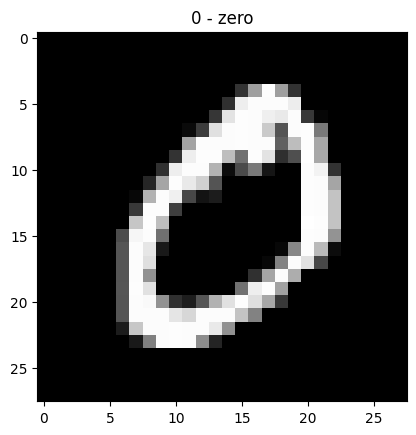

In [45]:
# Użycie biblioteki Matplotlib do wyświetlenia obrazu
# Permutacja wymiarów obrazu (img) z (1, 28, 28) na (28, 28, 1), aby pasował do funkcji imshow
# 'cmap="gray"' ustawia mapowanie kolorów na odcienie szarości
# plt.title ustawia tytuł wykresu, który pokazuje etykietę przypisaną do obrazu3
import matplotlib.pyplot as plt
plt.imshow(img.permute(1, 2, 0), cmap='gray')  # Wyświetlenie obrazu w odcieniach szarości
plt.title(f'{labels[label]}')  # Wyświetlenie tytułu z etykietą obrazu

In [46]:
# Ustalamy wielkość partii (ilość próbek w jednym przejściu przez model)
BATCH_SIZE = 32

# Ustalamy tempo uczenia (learning rate), które kontroluje, jak duże będą zmiany wag podczas trenowania
LEARNING_RATE = 0.01

# Określamy liczbę epok (czyli ile razy model przejdzie przez cały zestaw danych treningowych)
NUM_EPOCHS = 10

In [47]:
# Tworzenie DataLoaderów dla zbioru treningowego i testowego
# DataLoader umożliwia ładowanie danych w partiach (batchach), co przyspiesza proces trenowania modelu
from torch.utils.data import DataLoader

# train_dataloader - ładowanie danych treningowych
# Ustawiamy 'shuffle=True', aby dane były losowo mieszane w każdym epoku
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# test_dataloader - ładowanie danych testowych
# Ustawiamy 'shuffle=False', ponieważ dane testowe nie muszą być mieszane
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [48]:
# Tworzenie modelu w PyTorch z wykorzystaniem nn.Sequential
# Model jest tworzony jako sekwencja warstw, które są wykonywane po kolei
from torch import nn

input_size = 1 # Zakładając, że obraz jest w skali szarości, czyli 1 kanał (czarno-biały obraz)
output_size = 10 # Liczba klas (dla MNIST, to 10 cyfr od 0 do 9)

# Model jest zbudowany za pomocą nn.Sequential, gdzie warstwy są aplikowane jedna po drugiej
Model = nn.Sequential(
    nn.Flatten(),  # Flatten: spłaszcza obraz 28x28 do wektora o długości 28*28
    nn.Linear(in_features=input_size * 28 * 28, out_features=output_size),  # Warstwa w pełni połączona
    nn.ReLU()  # Funkcja aktywacji ReLU w warstwie ukrytej
)

In [49]:
model = Model

In [50]:
import torch

# Inicjalizacja funkcji strat i optymalizatora

# Jest to odpowiednia funkcja strat dla problemu klasyfikacji z wieloma klasami, np. MNIST (10 cyfr).
loss_fn = nn.CrossEntropyLoss()

# SGD jest jednym z najczęściej używanych optymalizatorów w głębokim uczeniu.
# Pomaga on w dostosowywaniu wag modelu podczas procesu uczenia, zmieniając je w zależności od gradientu funkcji strat.
optimizer = torch.optim.SGD(
    params=model.parameters(),  # parametry modelu, które optymalizator będzie aktualizował
    lr=LEARNING_RATE  # współczynnik uczenia (learning rate), który kontroluje wielkość kroków
)

In [51]:
from tqdm.auto import tqdm  # Importujemy tqdm, który pozwala na wyświetlanie paska postępu w konsoli

# Pętla po epokach
for epoch in tqdm(range(NUM_EPOCHS)):  # Używamy tqdm do wyświetlania paska postępu dla epok
    model.train()  # Ustawiamy model w tryb treningowy (np. aktywacja dropout, batch normalization)

    # Pętla po partiach danych treningowych (batchach)
    for X_train, y_train in train_dataloader:
        y_pred = model(X_train)  # Przewidywanie wyników dla danych wejściowych

        # Obliczamy stratę (loss) na podstawie przewidywań i prawdziwych etykiet
        train_loss = loss_fn(y_pred, y_train)

        # Zerowanie gradientów przed obliczeniem nowych
        optimizer.zero_grad()

        # Backpropagacja: obliczamy gradienty dla modelu
        train_loss.backward()

        # Aktualizujemy parametry modelu na podstawie obliczonych gradientów
        optimizer.step()

    # Po zakończeniu treningu w danej epoce, ustawiamy model w tryb ewaluacji (wyłączamy dropout itp.)
    model.eval()

    with torch.inference_mode():  # Używamy torch.inference_mode, aby wyłączyć śledzenie gradientów podczas ewaluacji
        for X_test, y_test in test_dataloader:  # Przechodzimy przez dane testowe
            test_pred = model(X_test)  # Przewidywanie wyników na danych testowych

            # Obliczamy stratę na podstawie przewidywań i prawdziwych etykiet
            test_loss = loss_fn(test_pred, y_test)

    # Drukujemy statystyki dla danej epoki (treningowa i testowa strata)
    print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.3316 | Test Loss: 0.3781
Epoch: 1 | Train Loss: 0.3661 | Test Loss: 0.2916
Epoch: 2 | Train Loss: 0.5877 | Test Loss: 0.2504
Epoch: 3 | Train Loss: 0.1682 | Test Loss: 0.2301
Epoch: 4 | Train Loss: 0.3730 | Test Loss: 0.2141
Epoch: 5 | Train Loss: 0.2608 | Test Loss: 0.1821
Epoch: 6 | Train Loss: 0.3771 | Test Loss: 0.1816
Epoch: 7 | Train Loss: 0.4525 | Test Loss: 0.1795
Epoch: 8 | Train Loss: 0.5217 | Test Loss: 0.1712
Epoch: 9 | Train Loss: 0.1675 | Test Loss: 0.1658


In [52]:
# Zadanie wytrenuj model na 10 epokach i pobaw się innymi wartościami takimi jak learning rate

In [53]:
# Zapisujemy stan (wag) modelu do pliku o nazwie "model.pth"
torch.save(model.state_dict(), "model.pth")

In [54]:
!pip install gradio --upgrade

In [55]:
import torch
import gradio as gr
import torchvision.transforms as transforms
from PIL import Image, ImageOps

# Initialize the model class and load the state dict (weights) saved earlier
# Model is a neural network class definition, so we need to instantiate it
loaded_model = Model  # You need to instantiate the model

# Load the saved model weights into the model instance
state_dict = torch.load('model.pth')  # Loading weights from the file
loaded_model.load_state_dict(state_dict)  # Applying the weights to the model

# Set the model to evaluation mode (this is necessary for inference)
loaded_model.eval()

# Define the image transformations that we need to apply on input images before passing them to the model
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize the image to 28x28 pixels (MNIST size)
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    transforms.ToTensor(),  # Convert the image to a tensor (required for model input)
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image based on MNIST mean and std
])

# Function for predicting the digit from the image
def predict_digit(img):
    # Invert the colors of the image to match the model's expected input (MNIST images are black digits on a white background)
    img = ImageOps.invert(img.convert("L"))

    # Apply the defined transformations (resize, grayscale, tensor conversion, normalization)
    img = transform(img).unsqueeze(0)  # Add a batch dimension to the image tensor (required for model input)

    # Disable gradient computation for efficiency during inference
    with torch.inference_mode():
        # Perform the forward pass with the model
        output = loaded_model(img)  # Using the loaded model to make predictions

        # Get the predicted class (digit) by selecting the index with the highest probability
        prediction = torch.argmax(output, dim=1).item()

    # Return the predicted digit as a string
    return str(prediction)

# Create the Gradio interface to allow users to interact with the model via a simple web interface
iface = gr.Interface(
    fn=predict_digit,  # The function to call when the user uploads an image
    inputs=gr.Image(type="pil"),  # Input type is an image (in PIL format)
    outputs="label",  # Output is the predicted label (the digit)
    live=False  # Set to False to predict only when the user clicks the submit button (not live)
)

# Launch the interface and make it publicly accessible
iface.launch(share=True, debug=True)

<ipython-input-55-23ec056b475f>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('model.pth')  # Loading weights from the file


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fa8c1a7fc6163e21c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fa8c1a7fc6163e21c9.gradio.live
